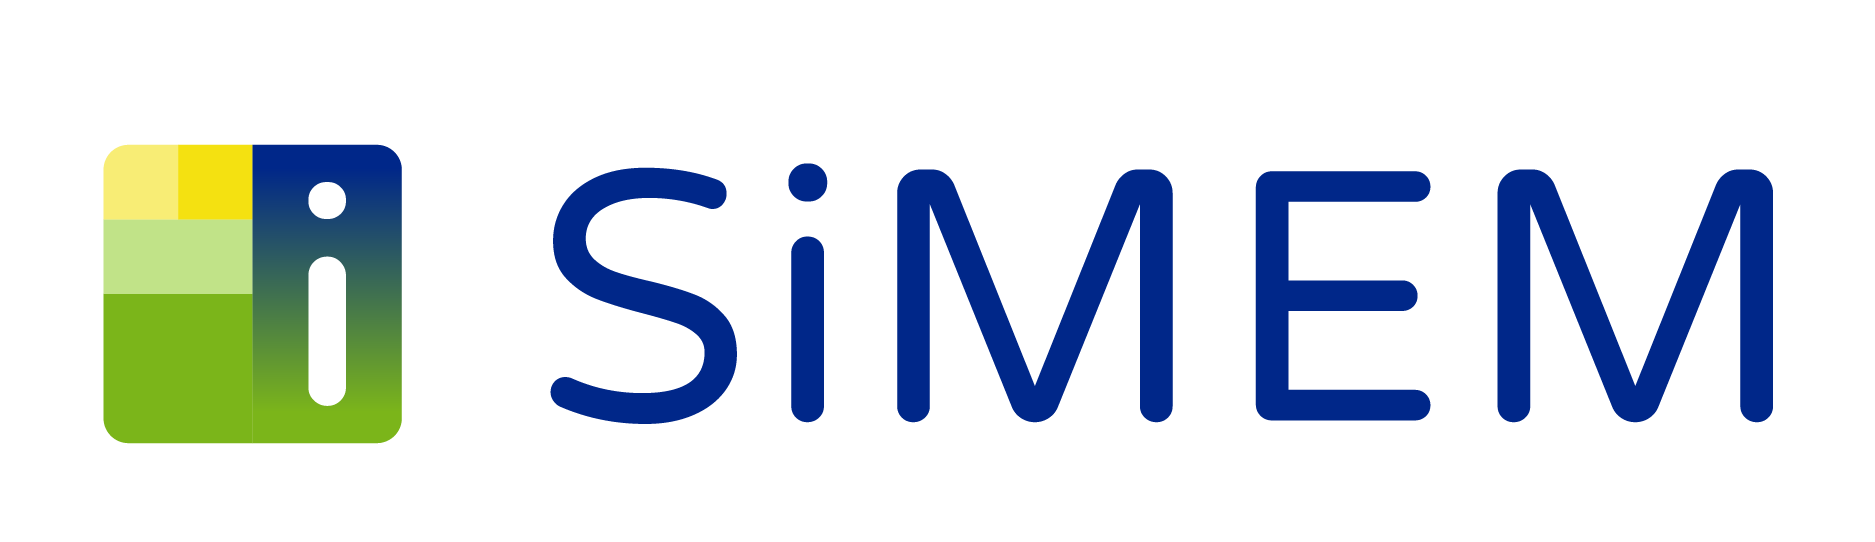

[SiMEM](https://www.simem.co/)

## Caso de uso - Energía Firme del Cargo por Confiabilidad verificada por el Centro Nacional de Despacho

# Objetivos de este Notebook

* Explicar cómo se realiza la instalación e importación de la librería pydataxm desde la consola para su uso en ambientes locales
* Explicar cómo se pueden consultar los conjuntos de datos a través de la librería Pydataxm
* Explicar cómo realizar el procesamiento y manipulación de los datos consultados
* Explicar el análisis de los datos consultados para dar respuesta al caso de uso propuesto
 
**Índice**

1. [Instalación de librerías](#section1)

2. [Importación de librerías](#section2)

3. [Consultar información de los conjuntos de datos](#section3)

4. [Manipulación de datos](#section4)

5. [Análisis para dar respuesta al caso de uso](#section5)

<a id='section1'></a>
# 1. Instalación de la librería
Ejecutar el siguiente comando en el CMD para instalar la librería de python.

In [1]:
# import sys
# !{sys.executable} -m pip install pydataxm

<a id='section2'></a>
# 2. Importación de librerías

In [2]:
# Importación de librerías necesarias para la consulta y análisis de datos
from pydataxm.pydatasimem import ReadSIMEM  # Importa clases para interactuar con datos del sistema SIMEM, utilizado para acceder a información energética en Colombia
import pandas as pd                         # Librería para manipulación y análisis de datos en estructuras tipo DataFrame, muy útil para limpiar, transformar y explorar datos
import matplotlib.pyplot as plt             # Para crear gráficos estáticos como barras, líneas, histogramas, etc.

<a id='section3'></a>
# 3. Consultar información de los conjuntos de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Para este ejemplo el conjunto a presentar es  [Energía Firme del Cargo por Confiabilidad verificada por el Centro Nacional de Despacho](https://www.simem.co/datadetail/B38EFCD8-C26F-44BF-ADDD-162E64A788F3).

Se definen los parámetros de entrada y se crea el objeto ReadSIMEM() para realizar las consultas.

La función main contiene todo el proceso para transportar la información del dataset entre el rango de fechas solicitadas a un dataframe. Después de este paso, el proceso es de manipulación y visualización de datos.

In [3]:
id_dataset_enficc = 'b38efc'                                              # ID del conjunto de datos a consultar
fecha_inicial = '2025-01-01'                                              # Fecha de inicio del rango de consulta
fecha_final = '2025-06-30'                                                # Fecha de fin del rango de consulta
simem_enficc = ReadSIMEM(id_dataset_enficc, fecha_inicial, fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_enficc = simem_enficc.main()                                           # Ejecución del método principal para obtener los datos en un DataFrame
display(df_enficc.head(20))                                               # Visualización de las primeras 20 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Energía Firme del Cargo por Confiabilidad verificada por el Centro Nacional de Despacho"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0007951259613037109
Extraccion de registros: 26.94659161567688
End of data extracting process
****************************************************************************************************


,Fecha,FechaInicio,FechaFin,CodigoPlanta,ENFICCVerificada,FechaPublicacion
0,2025-01-31,2023-12-01,2050-11-30,TGJ1,2424665.0,2024-02-08
1,2025-01-31,2023-12-01,2050-11-30,TFL1,3515013.0,2024-02-08
2,2025-01-31,2023-12-01,2050-11-30,TSJ2,3937816.0,2024-02-08
3,2025-01-31,2023-12-01,2050-11-30,PLYS,3096603.0,2024-02-08
4,2025-01-31,2023-12-01,2050-11-30,GCA3,1578985.0,2024-02-08
5,2025-01-31,2023-12-01,2050-11-30,TSR1,7620617.0,2024-02-08
6,2025-01-31,2023-12-01,2050-11-30,SLVJ,1556587.0,2024-02-08
7,2025-01-31,2022-12-01,2046-11-30,EPFV,236995.0,2023-01-06
8,2025-01-31,2023-12-01,2050-11-30,HMIN,133498.0,2024-02-08
9,2025-01-31,2023-12-01,2050-11-30,TYP1,189600.0,2024-02-08


Se lee el DataFrame con la información de plantas con el objetivo de cruzar la información

In [4]:
id_dataset_plantas = '0BFC9D'                                               # ID del conjunto de datos a consultar
fecha_inicial = '2025-01-01'                                                # Fecha de inicio del rango de consulta
fecha_final = '2025-06-30'                                                  # Fecha de fin del rango de consulta
simem_plantas = ReadSIMEM(id_dataset_plantas, fecha_inicial, fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_plantas = simem_plantas.main()                                           # Ejecución del método principal para obtener los datos en un DataFrame
df_plantas

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Parámetros técnicos de las plantas de generación"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0008206367492675781
Extraccion de registros: 16.149803638458252
End of data extracting process
****************************************************************************************************


,Fecha,CodigoDuracion,FechaPublicacion,CodigoPlanta,NombrePlanta,CodigoSICAgente,CapEfectivaNeta,FPO,CodigoSubAreaOperativa,CodigoAreaOperativa,TipoDespachoRecurso,TipoClasificacion,TipoGeneracion
0,2025-01-31,P1D,2025-01-31,2R22,LAGUNETA,ENDG,18000.0,2014-12-17,Are0017,Are0056,No Despachado Centralmente,GENERADOR,Hidraulica
1,2025-01-31,P1D,2025-01-31,SNT1,SANTA ANA,ENDG,8000.0,2005-06-09,Are0017,Are0056,No Despachado Centralmente,GENERADOR,Hidraulica
2,2025-01-31,P1D,2025-01-31,2S8N,GUAVIO MENOR,ENDG,9900.0,2016-04-27,Are0017,Are0056,No Despachado Centralmente,GENERADOR,Hidraulica
3,2025-01-31,P1D,2025-01-31,2UPJ,TEQUENDAMA 1,ENDG,14200.0,2018-04-03,Are0017,Are0056,No Despachado Centralmente,GENERADOR,Hidraulica
4,2025-01-31,P1D,2025-01-31,USQ1,USAQUEN,ENDG,1800.0,2013-04-15,Are0017,Are0056,No Despachado Centralmente,GENERADOR,Hidraulica
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,2025-06-01,P1D,2025-06-01,CIS1,INGENIO SAN CARLOS 1,EPSG,2000.0,2011-07-23,Are0032,Are0128,No Despachado Centralmente,COGENERADOR,Termica
59594,2025-06-01,P1D,2025-06-01,RPL1,INGENIO RIOPAILA 1,RPEG,16000.0,2018-05-21,Are0032,Are0128,No Despachado Centralmente,COGENERADOR,Termica
59595,2025-06-01,P1D,2025-06-01,PNC1,COGENERADOR PROENCA,PECG,19900.0,2014-04-29,Are0019,Are0128,No Despachado Centralmente,COGENERADOR,Termica
59596,2025-06-01,P1D,2025-06-01,INC1,INCAUCA 1,NTCG,60000.0,1998-10-21,Are0019,Are0128,No Despachado Centralmente,COGENERADOR,Termica


<a id='section4'></a>
# 4. Manipulación de datos
Los siguientes pasos corresponden a las actividades de manipulación y preparación de los datos que son relevantes para el análisis. 

Los dataframes se filtarán para tener los datos necesarios para la visualización.

In [5]:
df_enficc = df_enficc.sort_values('FechaPublicacion', ascending=False)                                                      # Se ordenan los datos según la Fecha de Publicación

df_enficc_filtrado = df_enficc.drop_duplicates(subset=['FechaInicio','CodigoPlanta'], keep='first').reset_index(drop=True)  # Se obtiene el dato más reciente de cada planta
df_enficc_filtrado = df_enficc_filtrado[['Fecha', 'CodigoPlanta','ENFICCVerificada', 'FechaInicio']]                        # Se seleccionan las columnas necesarias para el análisis

df_enficc_filtrado                                                                                                          # Se muestra el DataFrame filtrado

,Fecha,CodigoPlanta,ENFICCVerificada,FechaInicio
0,2025-01-23,3HF5,176962.0,2023-12-01
1,2025-05-25,TYP2,623520.0,2024-03-14
2,2025-04-02,3IZ6,371517.0,2023-12-01
3,2025-05-30,CHVR,8021002.0,2023-12-01
4,2025-05-31,GTPE,4439548.0,2023-12-01
...,...,...,...,...
68,2025-03-10,TCBE,806400.0,2022-12-01
69,2025-01-22,3DDT,524465.0,2022-12-01
70,2025-03-06,GEC3,3348225.0,2022-12-01
71,2025-01-27,GYPO,1201980.0,2022-12-01


In [6]:
df_plantas = df_plantas.sort_values('FechaPublicacion', ascending=False)                                          # Se ordenan los datos según la Fecha de Publicación

df_plantas_filtrado = df_plantas.drop_duplicates(subset=['CodigoPlanta'], keep='first').reset_index(drop=True)    # Se obtiene el dato más reciente de cada planta
df_plantas_filtrado = df_plantas_filtrado[['CodigoPlanta','TipoGeneracion']]                                      # Se seleccionan las columnas necesarias para el cruce de información

df_plantas_filtrado                                                                                               # Se muestra el DataFrame de plantas filtrado

,CodigoPlanta,TipoGeneracion
0,4XQA,Solar
1,AMR1,Hidraulica
2,AMF1,Hidraulica
3,BLL3,Hidraulica
4,TMS1,Hidraulica
...,...,...
376,3J4T,Solar
377,3LMH,Solar
378,3LLY,Solar
379,3J1J,Solar


In [7]:
df_completo = pd.merge(df_enficc_filtrado, df_plantas_filtrado, on=['CodigoPlanta', 'CodigoPlanta'], how='left')   # Se une el DataFrame de la ENFICC con el DataFrame de plantas
df_completo

,Fecha,CodigoPlanta,ENFICCVerificada,FechaInicio,TipoGeneracion
0,2025-01-23,3HF5,176962.0,2023-12-01,Solar
1,2025-05-25,TYP2,623520.0,2024-03-14,Termica
2,2025-04-02,3IZ6,371517.0,2023-12-01,Solar
3,2025-05-30,CHVR,8021002.0,2023-12-01,Hidraulica
4,2025-05-31,GTPE,4439548.0,2023-12-01,Hidraulica
...,...,...,...,...,...
68,2025-03-10,TCBE,806400.0,2022-12-01,Termica
69,2025-01-22,3DDT,524465.0,2022-12-01,Solar
70,2025-03-06,GEC3,3348225.0,2022-12-01,Termica
71,2025-01-27,GYPO,1201980.0,2022-12-01,Solar


In [8]:
df_filtrado = df_completo[['Fecha', 'CodigoPlanta','ENFICCVerificada', 'TipoGeneracion']]   # Selecciona únicamente las columnas 'Fecha','CodigoPlanta', 'TipoGeneracion y 'ENFICCVerificada' del DataFrame
df_filtrado = df_filtrado.sort_values('Fecha', ascending=False)                             # Se ordenan los datos por Fecha
df_filtrado['ENFICCVerificada'] = df_filtrado['ENFICCVerificada']/1000000                   # Se cambia de unidad por Gwh

display(df_filtrado)                                                                        # Muestra el DataFrame filtrado

,Fecha,CodigoPlanta,ENFICCVerificada,TipoGeneracion
17,2025-05-31,QUI1,4.846529,Hidraulica
4,2025-05-31,GTPE,4.439548,Hidraulica
35,2025-05-31,CLL1,0.773809,Hidraulica
21,2025-05-31,JAGS,1.129478,Hidraulica
34,2025-05-30,TDR1,0.892404,Termica
...,...,...,...,...
70,2025-03-06,GEC3,3.348225,Termica
72,2025-01-31,EPFV,0.236995,Solar
71,2025-01-27,GYPO,1.201980,Solar
0,2025-01-23,3HF5,0.176962,Solar


<a id='section5'></a>
# 5. Análisis para dar respuesta al caso de uso

Ahora se grafica el valor del ENFICC por tipo de generación

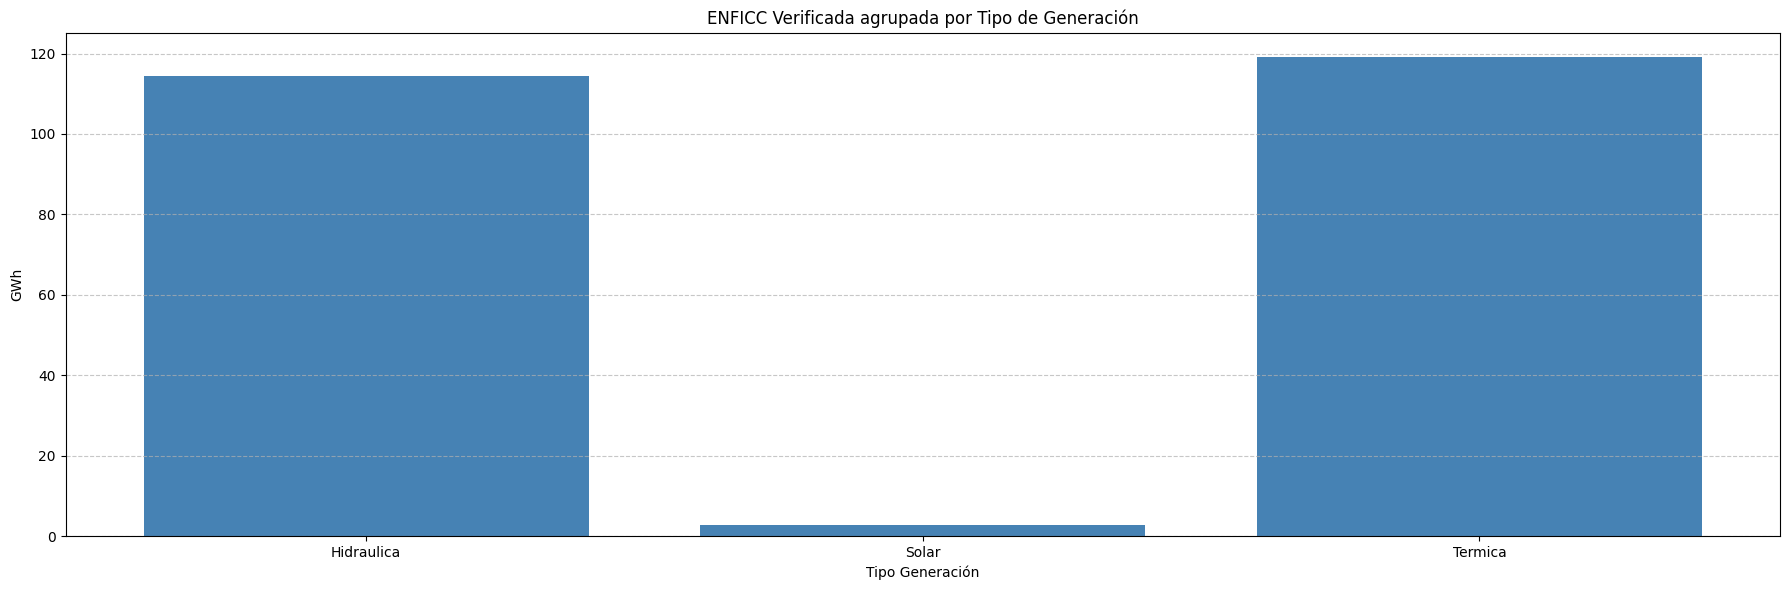

In [10]:
df_tipoGeneracion = df_filtrado.groupby('TipoGeneracion')['ENFICCVerificada'].sum().reset_index()  # Se agrupan los datos por tipo de Generación

# Crear la figura de gráfico con Matplotlib
plt.figure(figsize=(18, 6))  # Tamaño del gráfico

# Se añade el gráfico de barras
plt.bar(
    df_tipoGeneracion['TipoGeneracion'],         # Valores Eje X
    df_tipoGeneracion['ENFICCVerificada'],       # Valores Eje Y
    color='steelblue'                            # Color del gráfico (puedes ajustarlo si deseas)
)

# Se configura el diseño del gráfico
plt.title("ENFICC Verificada agrupada por Tipo de Generación")  # Título del gráfico
plt.xlabel("Tipo Generación")                                   # Título Eje X
plt.ylabel("GWh")                                               # Título Eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)                   # Líneas de guía en el eje Y

plt.tight_layout()  # Ajuste automático del diseño
plt.show()          # Se muestra el gráfico

Se grafican las 5 plantas con mayor ENFICC verificada

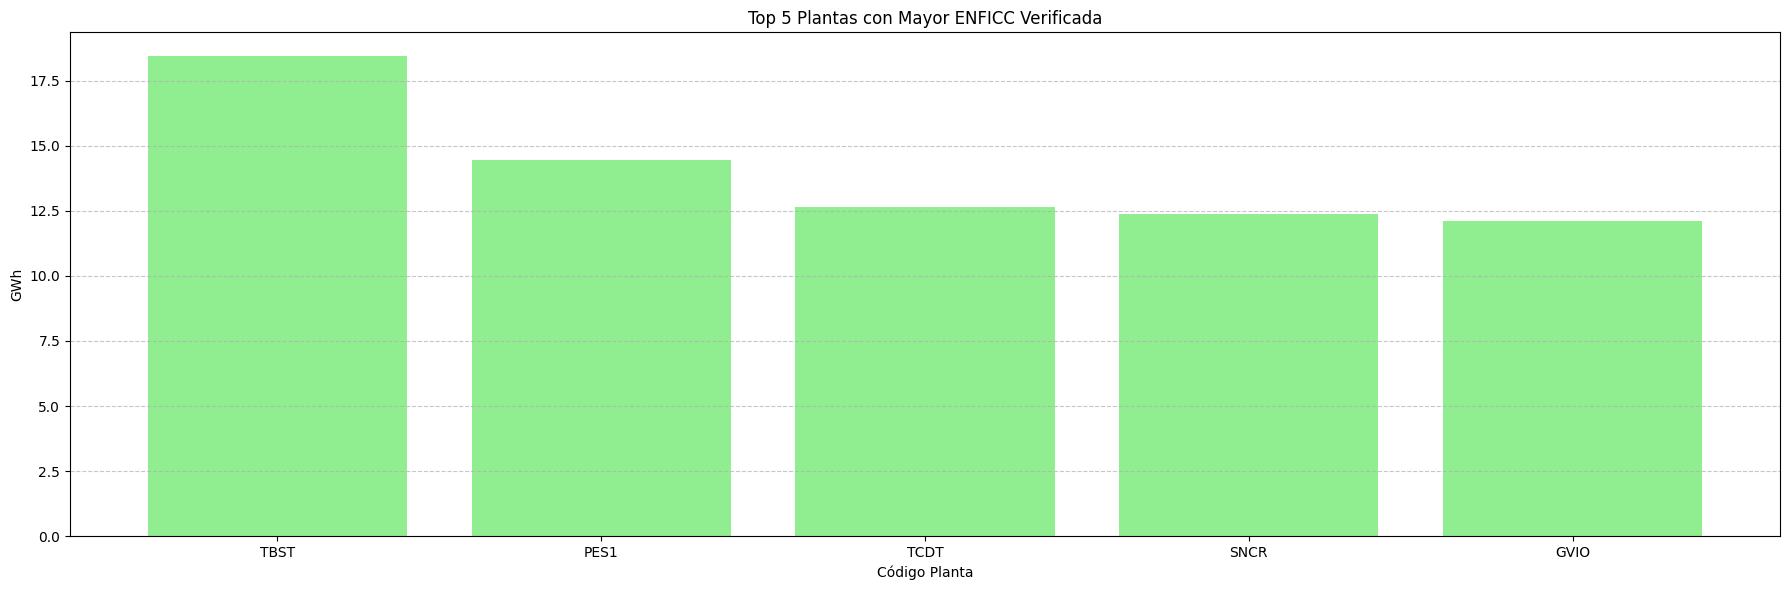

In [12]:
df_top_5 = df_filtrado.sort_values(by='ENFICCVerificada', ascending=False).head(5)   # Se ordenan los datos por valor de ENFICC y se seleccionan los 5 mayores

# Se crea la gráfica de barras
plt.figure(figsize=(18, 6))  # Tamaño del gráfico

plt.bar(
    df_top_5['CodigoPlanta'],           # Valores Eje X
    df_top_5['ENFICCVerificada'],       # Valores Eje Y
    color='lightgreen'                  # Color del gráfico
)

# Configurar el diseño del gráfico
plt.title('Top 5 Plantas con Mayor ENFICC Verificada')  # Título del gráfico
plt.xlabel('Código Planta')                             # Título Eje X
plt.ylabel('GWh')                                       # Título Eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)           # Líneas de guía en el eje Y

plt.tight_layout()  # Ajuste automático del diseño
plt.show()          # Se muestra el gráfico

Se grafica el ENFICC de las plantas que se deseen observar

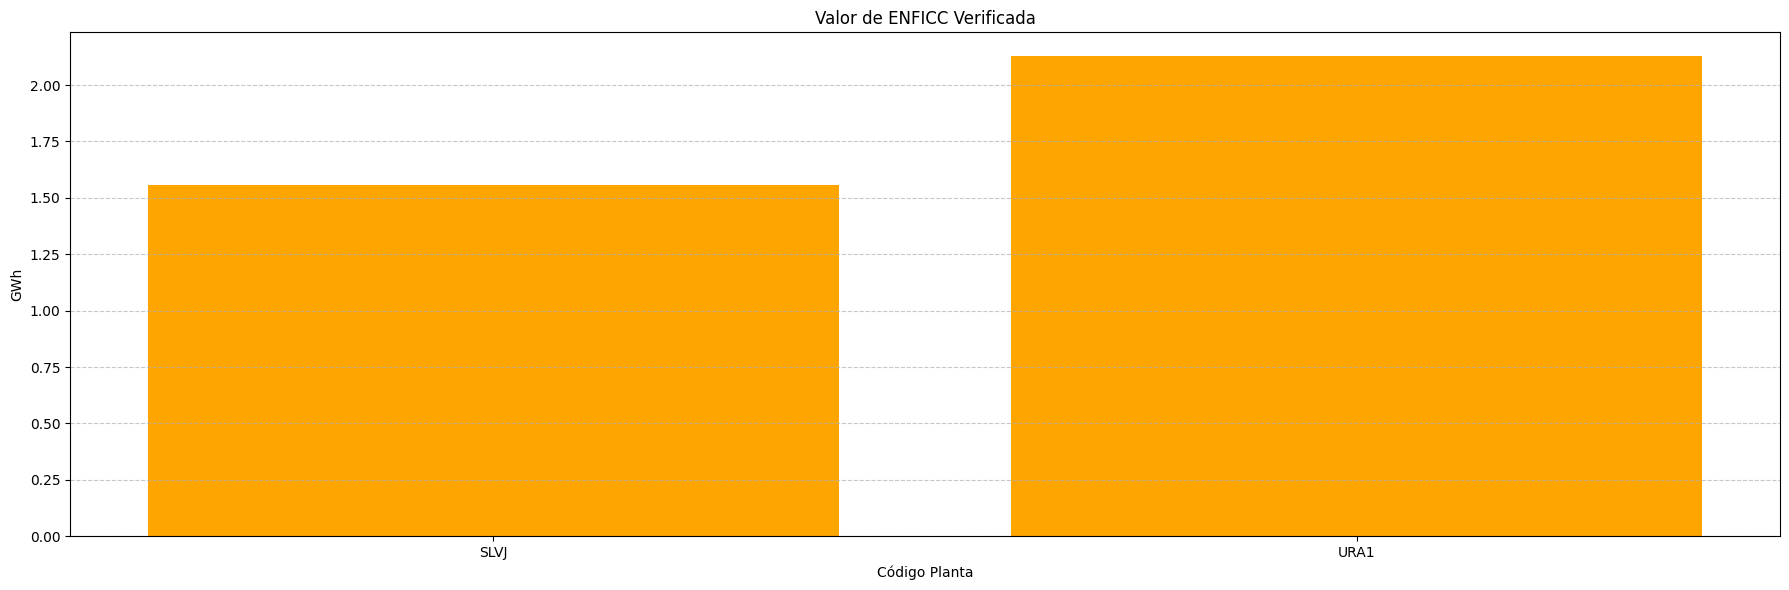

In [15]:
listado_plantas = ['SLVJ', 'URA1']                                                # Listado de plantas por el cuál se desea filtrar

if len(listado_plantas) > 0:
    df_filtrado = df_filtrado[df_filtrado['CodigoPlanta'].isin(listado_plantas)]  # Se filtra por el listado de plantas

# Se crea la gráfica de barras
plt.figure(figsize=(18, 6))  # Tamaño del gráfico

plt.bar(
    df_filtrado['CodigoPlanta'],        # Valores Eje X
    df_filtrado['ENFICCVerificada'],    # Valores Eje Y
    color='orange'                      # Color del gráfico
)

# Configurar el diseño del gráfico
plt.title('Valor de ENFICC Verificada')         # Título del gráfico
plt.xlabel('Código Planta')                     # Título Eje X
plt.ylabel('GWh')                               # Título Eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)   # Líneas de guía en el eje Y

plt.tight_layout()  # Ajuste automático del diseño
plt.show()          # Se muestra el gráfico